# Stellar Classification Dataset - SDSS17

## Qual o problema a ser resolvido?
Na astronomia, o esquema de classificação de galáxias, quasares e estrelas
é um dos mais fundamentais. O dataset Stellar Classification Dataset - SDSS17
contém dados espectrais de diferentes corpos estelares visando classificar estrelas,
galáxias e quasares com base nessas características.

### Descrição do dataset
Esse dataset consiste em 100.000 observações (linhas) do espaço feitas pelo
SDSS (Sloan Digital Sky Survey), onde cada observação é descrita por 17 colunas
(colunas) de recursos e 1 coluna (label) de classe que a identifica as observações
como uma estrela, galáxia ou quasar.

O resultado que desejamos alcançar é a classificação em uma das três
categorias (estrela, galáxia e quasar) com base nos dados analisados.

### Tipo do problema
O tipo do nosso problema envolve aprendizagem supervisionada, mais
especificamente, um problema de classificação.

## Análise exploratória dos dados

### Importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

### Carregando os dados

In [2]:
dados = pd.read_csv('./data/star_classification.csv')
dados.shape

(100000, 18)

### Análise dos tipos de dados

In [105]:
dados.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

### Análise de valores faltantes

In [106]:
dados.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

### Descrição dos dados

In [107]:
dados.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [108]:
dados.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


### Descrição da coluna 'class'

In [109]:
dados['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [3]:
labelEncoder = LabelEncoder()
dados['class'] = labelEncoder.fit_transform(dados['class'])
dados['class'].value_counts()

class
0    59445
2    21594
1    18961
Name: count, dtype: int64

### Correlação

In [111]:
dados.corr()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,-0.036012,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,-0.011756,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.014452,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,-0.024645,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,-0.020066,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,-0.076766,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.015028,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,-0.001614,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,-0.036014,0.065400,0.239459,0.262687,0.067165
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Dados drop

In [4]:
print(dados['rerun_ID'].value_counts())
dados.drop(columns=['rerun_ID'], inplace=True)

rerun_ID
301    100000
Name: count, dtype: int64


In [113]:
dados.corr()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,-0.046997,0.031498,0.239461,-0.036012,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,0.019582,-0.165577,-0.002553,-0.011756,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,0.032565,-0.173416,0.112329,0.014452,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,0.003548,-0.008374,0.029997,-0.024645,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,0.003508,-0.008852,0.039443,-0.020066,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,0.008480,-0.026423,0.655245,-0.076766,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,0.007615,-0.026679,0.661641,0.015028,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,0.003365,-0.008903,0.037813,-0.001614,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,-0.047098,0.031498,0.239460,-0.036014,0.065400,0.239459,0.262687,0.067165
cam_col,-0.046997,0.019582,0.032565,0.003548,0.003508,0.008480,0.007615,0.003365,-0.047098,1.000000,-0.015684,-0.001946,0.023138,0.000097,-0.001949,-0.006745,0.121597


#### heatmap

<Axes: >

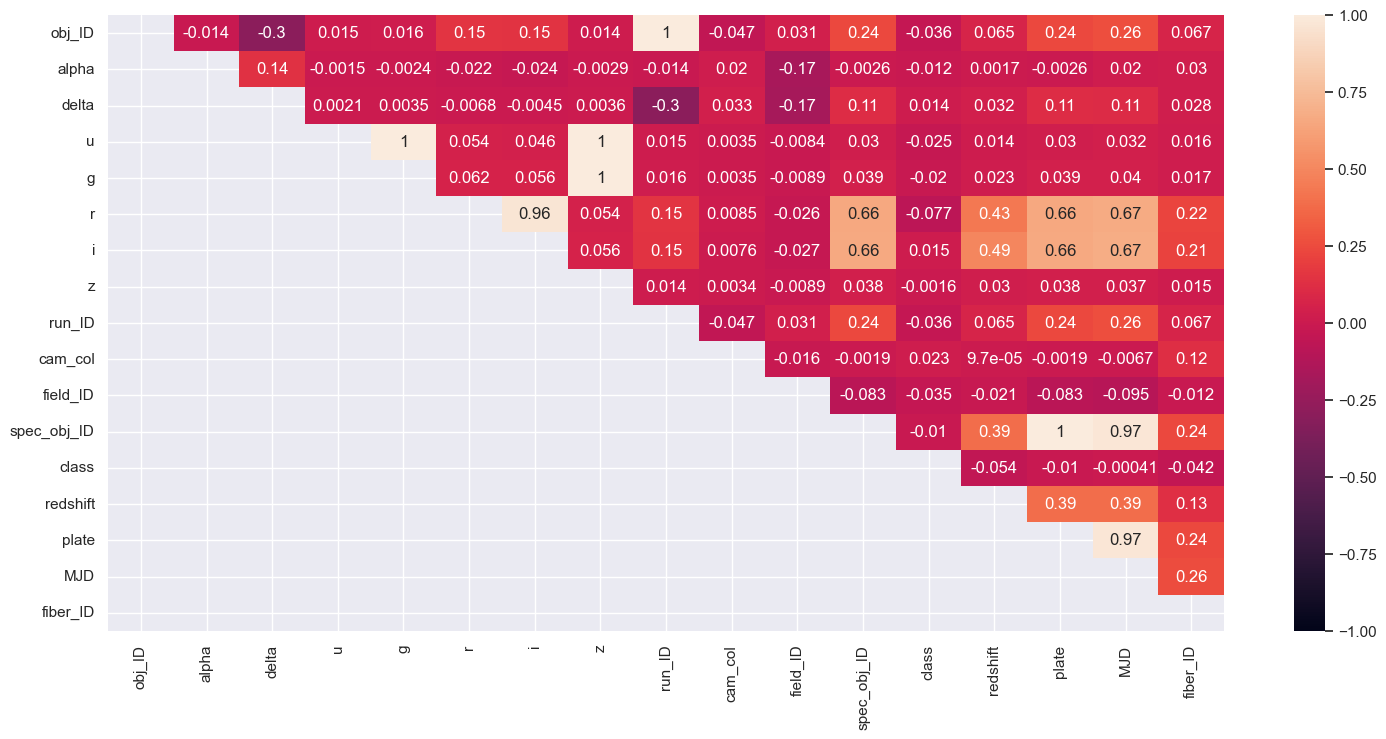

In [114]:
mask = np.tril(dados.corr())
sns.set(rc={'figure.figsize':(18, 8)})
sns.heatmap(dados.corr(), vmin=-1, vmax=1, annot=True, mask=mask)


In [5]:
dados.drop(columns=['z'], inplace=True)

#### Dividindo os dados

In [6]:
X = dados.drop(columns=['class'])
y = dados['class']

#### Histogramas

15


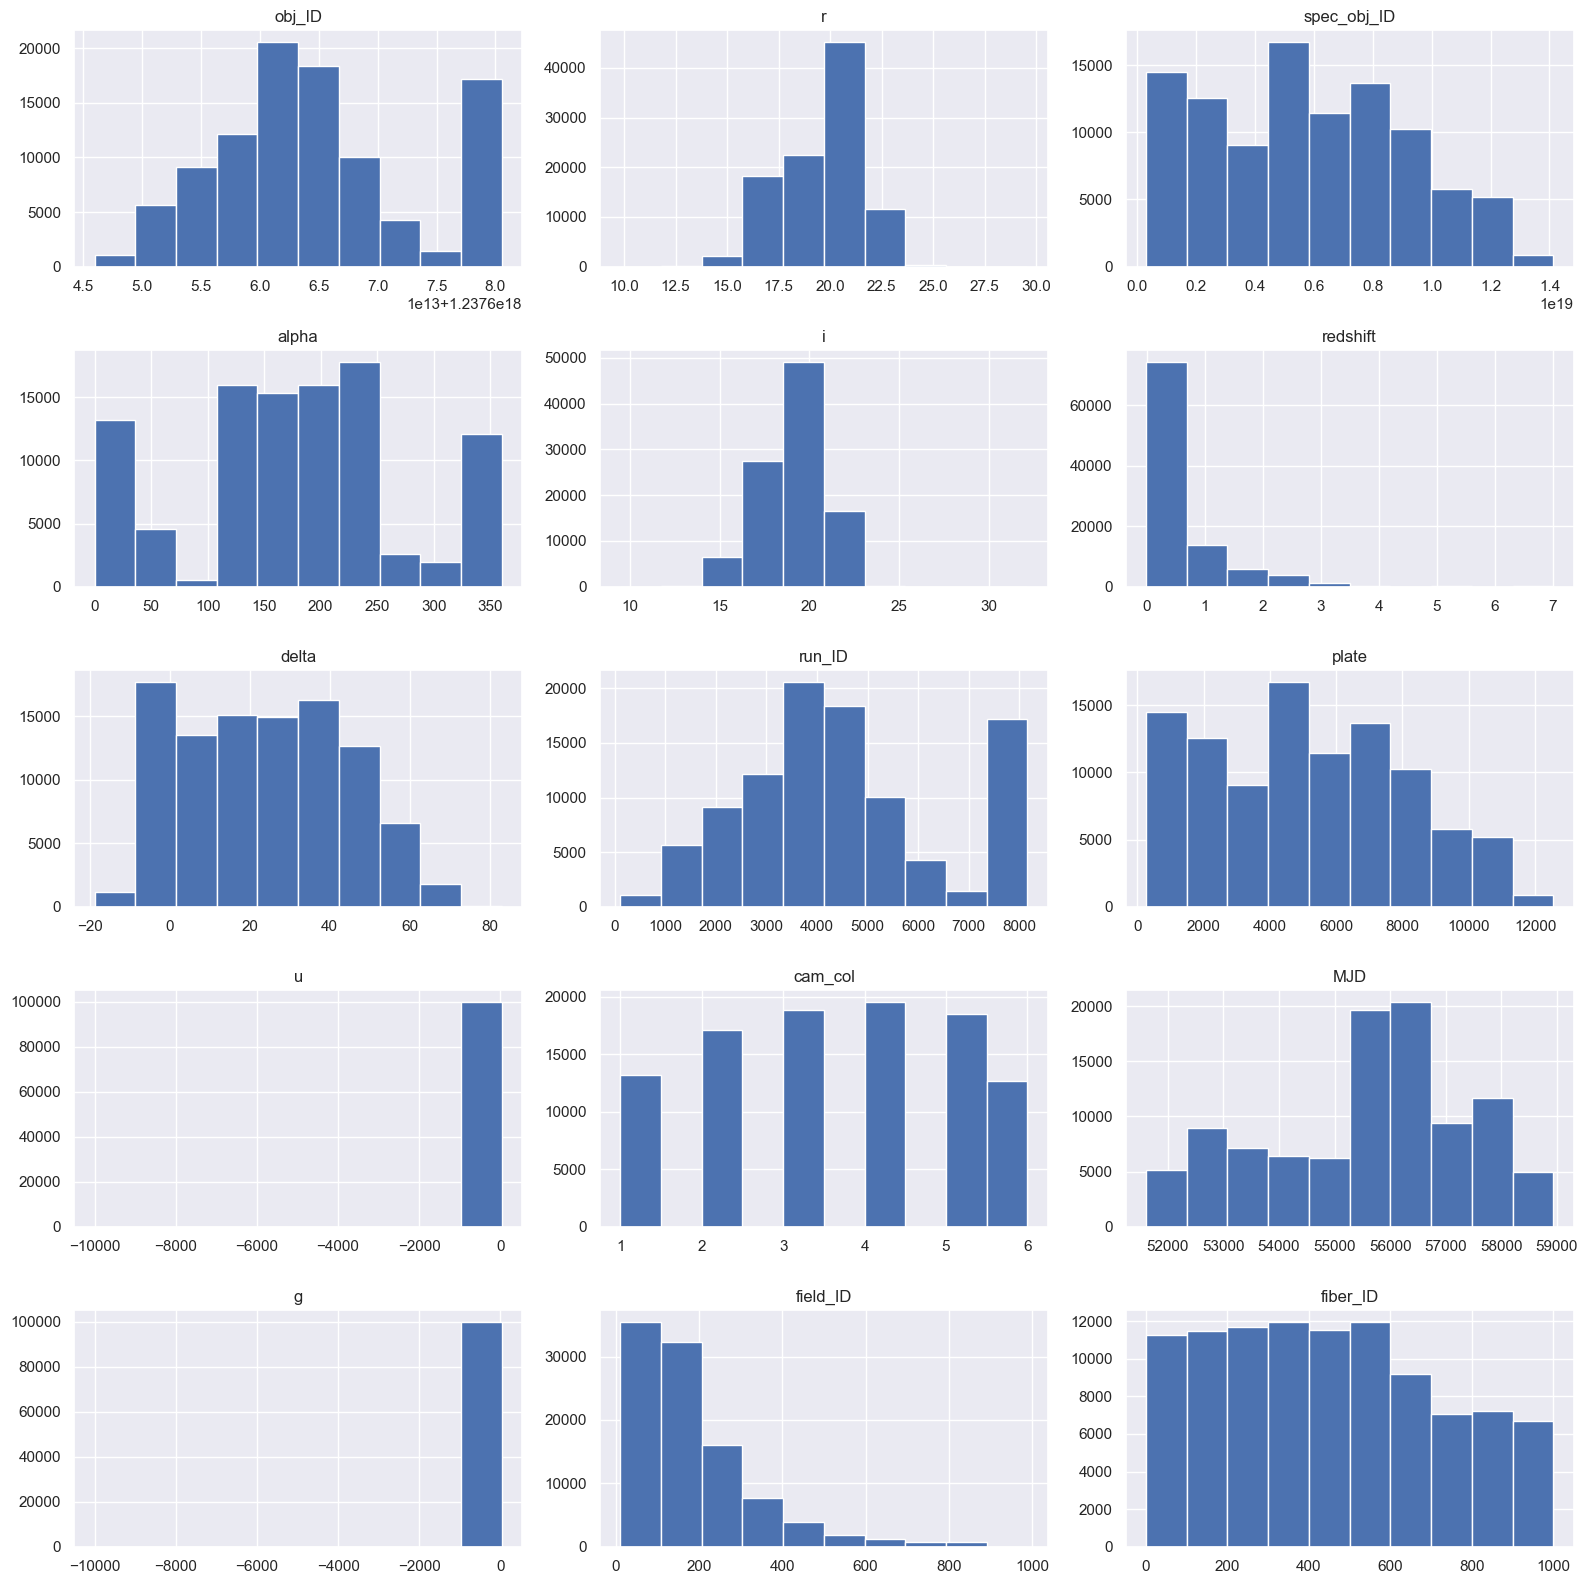

In [149]:
import math
fig, axs = plt.subplots(5, 3, figsize=(16, 16))

columns = list(X.columns)
print(len(columns))

for ind, col in enumerate(columns):
    axs[ind%5][math.floor(ind/5)].hist(X[col])
    axs[ind%5][math.floor(ind/5)].set_title(col)

plt.tight_layout()
plt.show()

### Técnicas de machine learning 

#### Divisão em treino, teste e normalização dos dados

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

normalizacao = StandardScaler()
normalizacao.fit(X_train)

X_train_std = normalizacao.transform(X_train)
X_test_std = normalizacao.transform(X_test)

#### KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 30, 2), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'chebyshev', 'manhattan']}

knn = KNeighborsClassifier() 
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train_std, y_train)

In [33]:
print(f'Best Params: {knn_cv.best_params_}')
print(f'Best Score:  {round(knn_cv.best_score_ * 100, 2)}%')

Best Params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Score:  90.65%


In [38]:
y_pred = knn_cv.predict(X_test_std)

In [41]:
print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')

Accuracy Score: 91.16%


### Árvore de decisão

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
# Utilizando GridSearchCV para automatizar o teste do modelo com vários parâmetros

classifier = DecisionTreeClassifier()

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

# Cria a grid utilizando o classificador, os parâmetros selecionados, e cross-validation com 5 folds
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Melhores parâmetros encontrados
print("Melhores parâmetros: ", grid_search.best_params_)
print("Melhor Score: ", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   3.5s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   1.8s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   1.9s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   1.8s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   1.8s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   1.7s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   1.8s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   1.9s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   1.8s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   1.8s
[CV] END criterion=gini, max_depth=None, min_samples_split=10; total time=   2.1s
[CV] END criterion=gini, max_depth=None, min_s

In [10]:
best_params = grid_search.best_params_  
classifier = DecisionTreeClassifier(**best_params)  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10)

In [13]:
y_pred = classifier.predict(X_test)

print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')

Accuracy Score: 97.66%


### MLP

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'n_estimators': np.arange(100, 501, 100), 
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(2, 11, 2),
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10],
    'random_state': [42]
}

rfc = RandomForestClassifier()
rfc_cv = GridSearchCV(rfc, param_grid, cv=5, verbose=2)
rfc_cv.fit(X_train, y_train)

In [ ]:
print(f'Best Params: {rfc_cv.best_params_}')
print(f'Best Score:  {round(rfc_cv.best_score_ * 100, 2)}%')

In [ ]:
y_pred = rfc_cv.best_estimator_.predict(X_test)
print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')